In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme (color_codes=True)

In [3]:
df=pd.read_csv('NYRealstatePricing.csv')
df.head()

,F1,id,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,0,2595,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1
1,1,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1
2,2,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19
3,3,5121,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365
4,4,5178,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242


In [4]:
df.select_dtypes(include='object').nunique()

neighbourhood    186
room_type          4
dtype: int64

In [5]:
df.shape

(17614, 12)

In [6]:
df.neighbourhood.unique()

array(['Midtown', 'Brooklyn', 'Manhattan', 'Bedford-Stuyvesant',
       'Lower East Side', 'Park Slope', 'Williamsburg', 'East Village',
       'Harlem', 'Hamilton Heights', 'Bushwick', 'Alphabet City',
       'Flatbush', 'Long Island City', 'Clinton Hill', 'Fort Greene',
       'Upper West Side', 'Greenpoint', 'Kips Bay', "Hell's Kitchen",
       'East Harlem', 'Queens', 'Meatpacking District',
       'Brooklyn Heights', 'Prospect Heights', 'Chelsea',
       'Carroll Gardens', 'West Village', 'Gowanus', 'Lefferts Garden',
       'Flatlands', 'Kew Garden Hills', 'Upper East Side', 'Sunnyside',
       'DUMBO', 'Staten Island', 'Highbridge', 'Ridgewood', 'Jamaica',
       'Middle Village', 'Cobble Hill', 'Roosevelt Island', 'Soho',
       'West Brighton', 'Eastchester', 'Crown Heights',
       'Morningside Heights', 'Chinatown', 'Red Hook',
       'Kingsbridge Heights', 'The Rockaways', 'Midtown East',
       'Forest Hills', 'The Bronx', 'Washington Heights', 'Astoria',
       'Baycheste

In [7]:

# Define the conditions for each segment
manhattan = ['Midtown', 'Lower East Side', 'East Village', 'Harlem', 'Hamilton Heights', 'Alphabet City', 'Upper West Side', 'Kips Bay', "Hell's Kitchen", 'Upper East Side', 'Soho', 'Washington Heights', 'Gramercy Park', 'Financial District', 'Greenwich Village', 'Flatiron District', 'Inwood']
brooklyn = ['Bedford-Stuyvesant', 'Park Slope', 'Williamsburg', 'Bushwick', 'Flatbush', 'Clinton Hill', 'Fort Greene', 'Greenpoint', 'Carroll Gardens', 'Gowanus', 'Lefferts Garden', 'Brooklyn Heights', 'Prospect Heights', 'DUMBO', 'Cobble Hill', 'Windsor Terrace', 'Greenwood Heights', 'Boerum Hill', 'Borough Park', 'Canarsie', 'Columbia Street Waterfront']
queens = ['Long Island City', 'Astoria', 'Sunnyside', 'Jamaica', 'Ridgewood', 'Flushing', 'Ditmars / Steinway', 'Jackson Heights', 'South Beach', 'College Point', 'Country Club', 'East Elmhurst']
bronx = ['Highbridge', 'Baychester', 'Fordham', 'Kingsbridge Heights', 'Morris Heights', 'Concourse', 'Concourse Village', 'Melrose', 'Mount Eden', 'University Heights', 'Norwood', 'Hunts Point', 'Spuyten Duyvil']
staten_island = ['West Brighton', 'Rosebank', 'Stapleton', 'Graniteville', 'Tottenville', 'Annadale', 'Dongan Hills', 'Randall Manor', 'Concord', 'Van Nest']
# Define a function that returns the segment based on the neighbourhood 
def segment_neighborhood (neighbourhood):
    if neighbourhood in manhattan:
        return 'Manhattan'
    elif neighbourhood in brooklyn:
        return 'Brooklyn'
    elif neighbourhood in queens:
        return 'Queens'
    elif neighbourhood in bronx:
        return 'Bronx'
    elif neighbourhood in staten_island:
        return 'Staten Island'
    else:
        return 'Other'

In [8]:
df['neighbourhood']=df['neighbourhood'].apply(segment_neighborhood)

<AxesSubplot:>

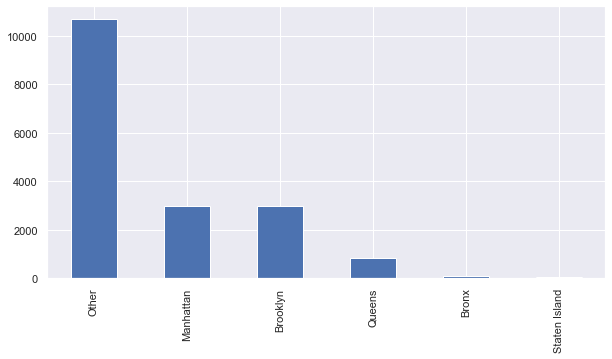

In [9]:
plt.figure(figsize=(10,5))
df['neighbourhood'].value_counts().plot(kind='bar')

In [10]:
df.drop(columns=['latitude', 'longitude', 'F1', 'id'],inplace=True)
df.shape

df.head()

,neighbourhood,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,Manhattan,Entire home/apt,225,15,10,48,0.39,1
1,Other,Entire home/apt,89,188,1,295,4.67,1
2,Other,Entire home/apt,200,362,3,78,0.60,19
3,Brooklyn,Private room,60,0,29,49,0.38,365
4,Other,Private room,79,141,2,454,3.52,242


In [11]:
df.shape

(17614, 8)

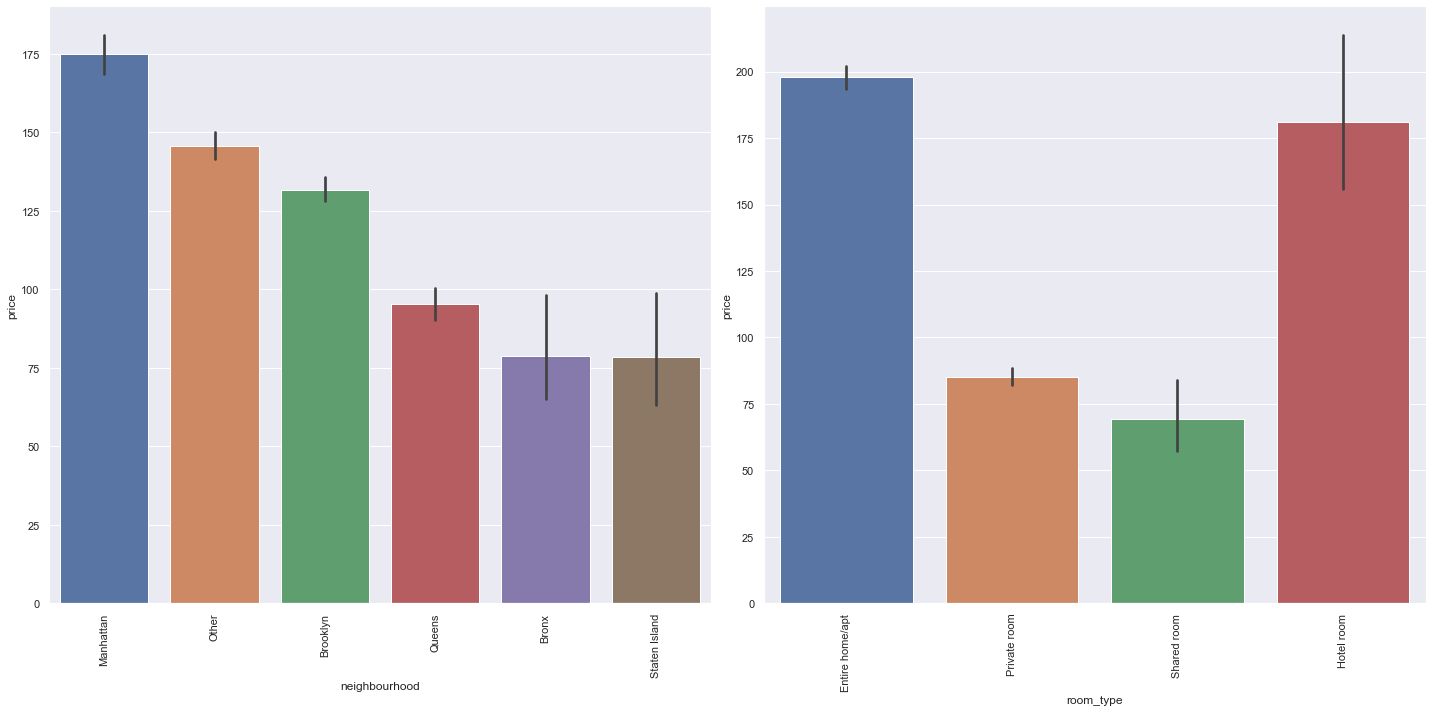

In [12]:

# List of categorical variables to plot 
cat_vars=['neighbourhood', 'room_type']
# create figure with subplots
fig, axs =plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs=axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate (cat_vars):
    sns.barplot(x=var, y='price', data=df, ax=axs[i])
    axs[i].set_xticklabels (axs[i].get_xticklabels (), rotation=90)

# adjust spacing between subplots
fig.tight_layout()
# show plot 
plt.show()

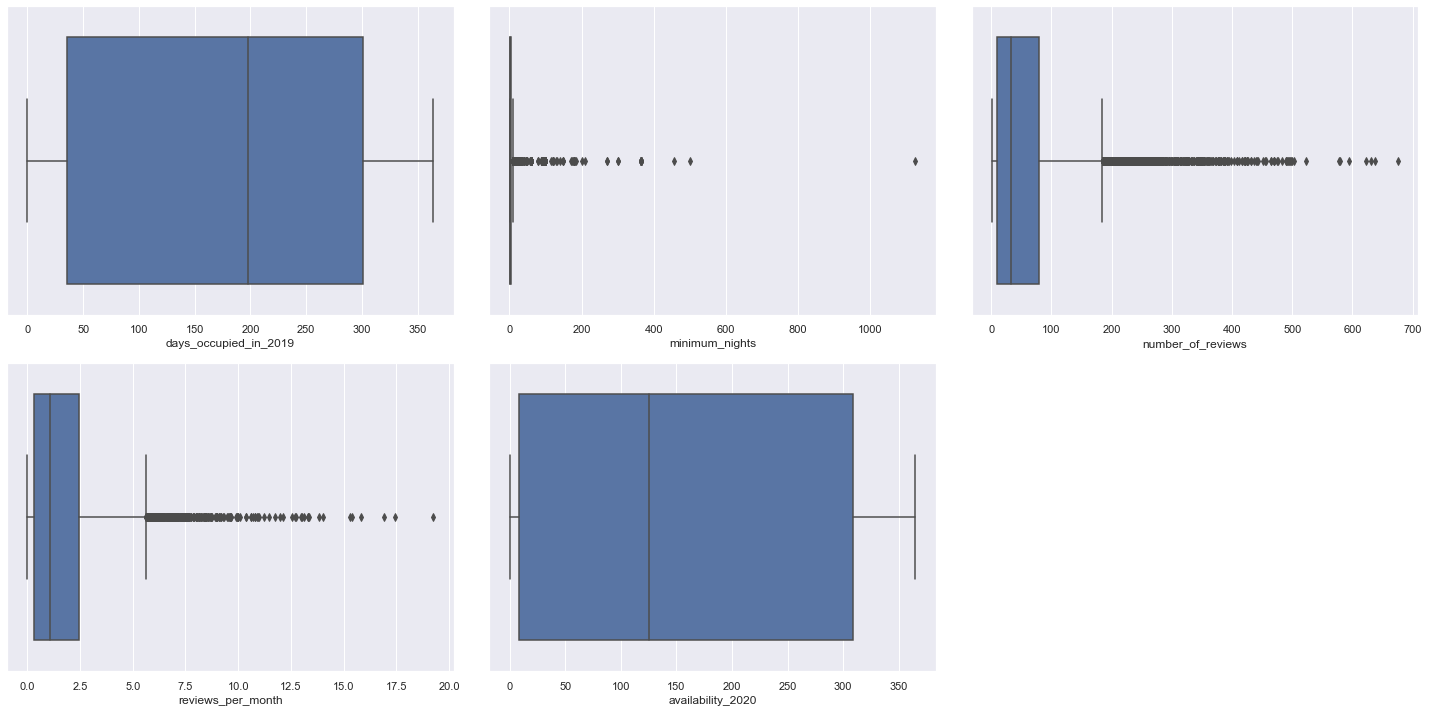

In [13]:

num_vars =['days_occupied_in_2019', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'availability_2020']
fig, axs = plt.subplots (nrows=2, ncols=3, figsize=(20, 10)) 
axs = axs.flatten()
#Show the boxplot
for i, var in enumerate (num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])
# adjust spacing between subplots 
fig.tight_layout()
# remove the sixth subplot 
fig.delaxes (axs [5])
plt.show()

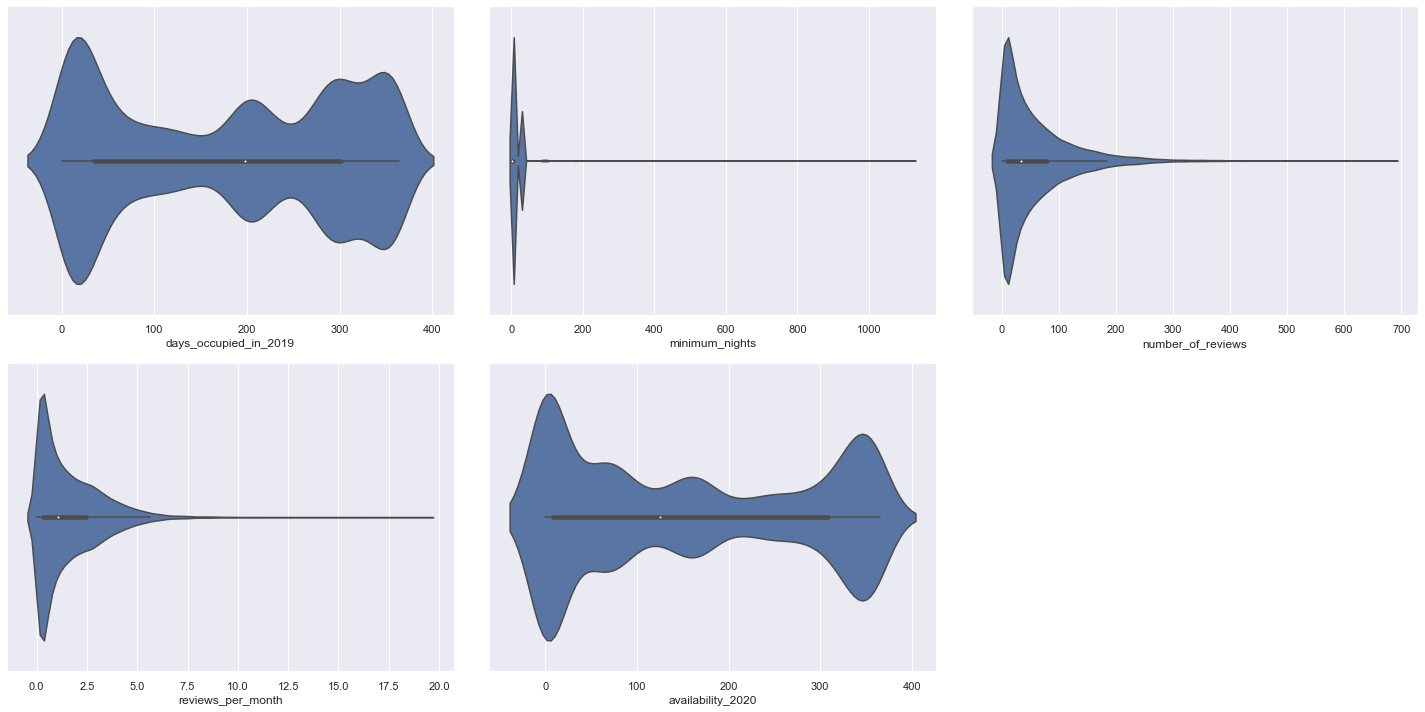

In [14]:

num_vars =['days_occupied_in_2019', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'availability_2020']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10)) 
axs = axs.flatten()
for i, var in enumerate (num_vars):
    sns.violinplot (x=var, data=df, ax=axs[i])
fig.tight_layout()
# remove the sixth subplot
fig.delaxes (axs[5])
plt.show()

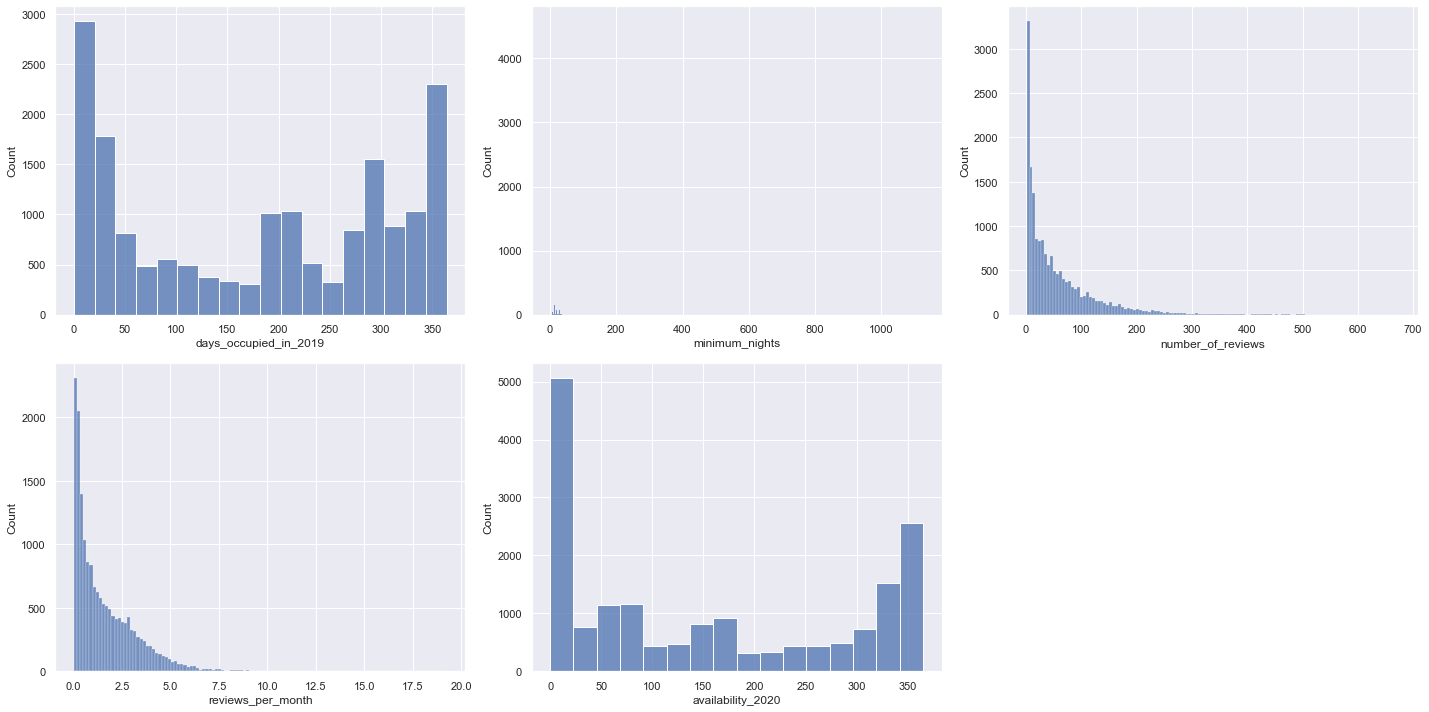

In [15]:

num_vars =['days_occupied_in_2019', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'availability_2020']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10)) 
axs = axs.flatten()
for i, var in enumerate (num_vars):
    sns.histplot (x=var, data=df, ax=axs[i])
fig.tight_layout()
# remove the sixth subplot
fig.delaxes (axs[5])
plt.show()

In [16]:
#Check the missing value
check_missing = df.isnull().sum() *100/df.shape[0]
check_missing [check_missing> 0].sort_values (ascending=False)

Series([], dtype: float64)

In [17]:
# Loop over each column in the DataFrame where dtype is 'object' 
for col in df.select_dtypes (include=['object']).columns:
# Print the column name and the unique values
    print(f" {col}: {df[col].unique()}")

 neighbourhood: ['Manhattan' 'Other' 'Brooklyn' 'Queens' 'Bronx' 'Staten Island']
 room_type: ['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']


In [18]:

from sklearn import preprocessing
# Loop over each column in the DataFrame where dtype is 'object' 
for col in df.select_dtypes (include=['object']).columns:
# Initialize a LabelEncoder object 
    label_encoder = preprocessing.LabelEncoder()
# Fit the encoder to the unique values in the column 
    label_encoder.fit(df [col].unique())
# Transform the column using the encoder 
    df[col] = label_encoder.transform(df[col])
# Print the column name and the unique encoded values 
    print(f"{col} {df[col].unique()}")

neighbourhood [2 3 1 4 0 5]
room_type [0 2 3 1]


In [19]:
df.head()

,neighbourhood,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,2,0,225,15,10,48,0.39,1
1,3,0,89,188,1,295,4.67,1
2,3,0,200,362,3,78,0.60,19
3,1,2,60,0,29,49,0.38,365
4,3,2,79,141,2,454,3.52,242


In [20]:

# specify the columns to remove outliers from dataframe 
column_names = ['minimum_nights', 'number_of_reviews', 'reviews_per_month']
# remove outliers for each selected column using the IQR method
for column_name in column_names:
    Q1=df[column_name].quantile (0.25) 
    Q3=df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR)))]


df.head()

,neighbourhood,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
2,3,0,200,362,3,78,0.60,19
5,2,0,150,86,1,161,1.29,1
7,1,2,89,12,4,175,1.35,0
9,1,0,140,319,2,170,1.33,0
11,3,0,99,172,3,75,4.43,63


In [21]:
df.shape

(13869, 8)

<AxesSubplot:>

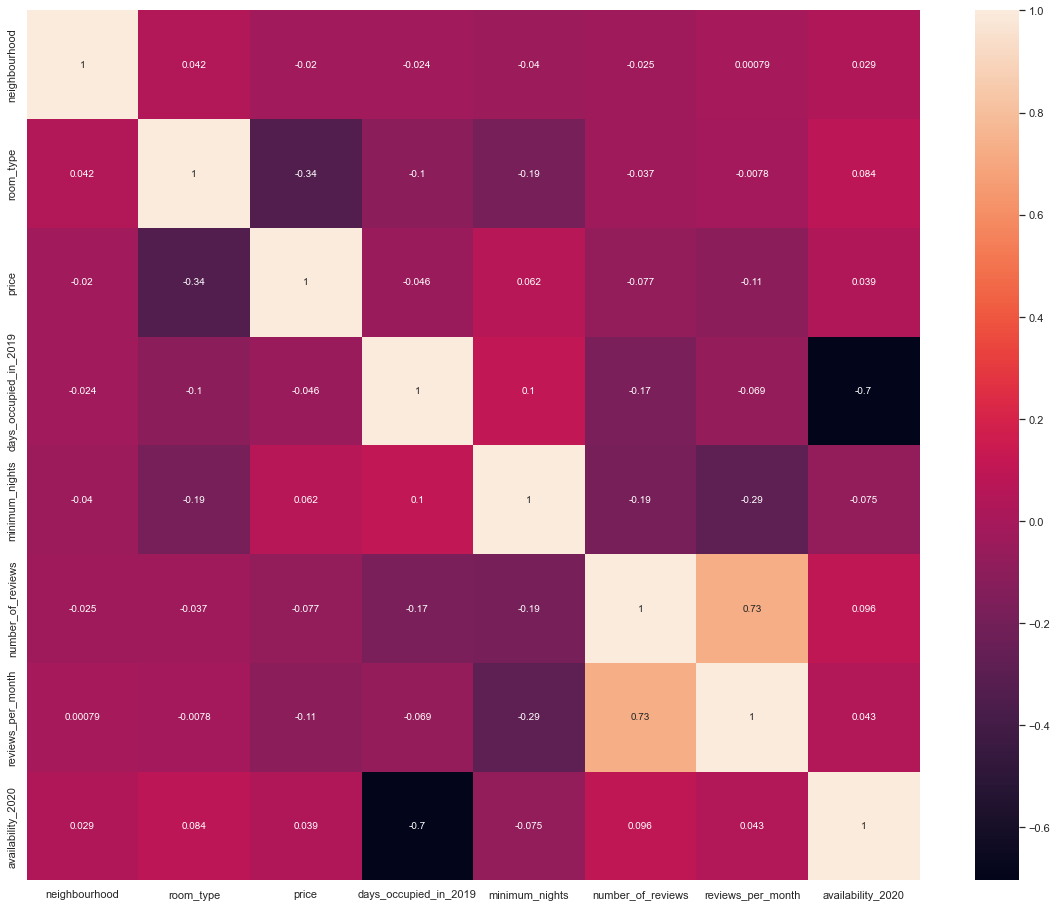

In [22]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [23]:
X = df.drop('price', axis=1) 
y = df['price']
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [25]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV 
from sklearn.datasets import load_boston
# Create a Decision TreeRegressor object
dtree=DecisionTreeRegressor()
# Define the hyperparameters to tune and their values
param_grid = {'max_depth': [2, 4, 6, 8],
'min_samples_split': [2, 4, 6, 8],
'min_samples_leaf': [1, 2, 3, 4],
'max_features': ['auto', 'sqrt', 'log2'],
'random_state': [0, 7, 42]
}
# Create a GridSearchCV object
grid_search= GridSearchCV (dtree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

{'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [29]:
dtree=DecisionTreeRegressor(max_depth=6, max_features='sqrt', min_samples_leaf=4,random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, max_features='sqrt', min_samples_leaf=4,
                      random_state=42)

In [30]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error 
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape =mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred) 
r2=metrics.r2_score (y_test, y_pred)
rmse = math.sqrt(mse)
print('MAE is {}'.format(mae)) 
print('MAPE is {}'.format(mape)) 
print('MSE is {}'.format(mse)) 
print('R2 score is {}'.format(r2)) 
print('RMSE score is {}'.format(rmse))

MAE is 68.27607111593002
MAPE is 128209052541348.56
MSE is 26876.165990994585
R2 score is 0.04702166330527613
RMSE score is 163.93951930817227


In [31]:
dtree=DecisionTreeRegressor(max_depth=2, max_features='auto', min_samples_leaf=1,random_state=0, min_samples_split= 2)
dtree.fit(X_train,y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=2, max_features='auto', random_state=0)

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create decision tree regressor with given hyperparameters
dtree = DecisionTreeRegressor(max_depth=2, max_features='auto', min_samples_leaf=1, min_samples_split=2, random_state=0)

# Fit the model to the training data
dtree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtree.predict(X_test)

# Compute various evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))  #average absolute difference between the predicted and actual values
print('MAPE is {}'.format(mape))  #average percentage difference between the predicted and actual values
print('MSE is {}'.format(mse))    #average squared difference between the predicted and actual values
print('R2 score is {}'.format(r2)) #variance in the target variable that can be explained by the independent variables
print('RMSE score is {}'.format(rmse)) #difference between predicted and actual values in a regression problem


MAE is 66.14954772320876
MAPE is 129883280540551.45
MSE is 25203.792995971908
R2 score is 0.10632086675802677
RMSE score is 158.75702502872718


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
